Notebook sobre a competição "Give Me Some Credit", do site Kaggle. 

https://www.kaggle.com/c/GiveMeSomeCredit

# Give Me Some Credit

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.

**GOAL**:

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Historical data are provided on 250,000 borrowers and the prize pool is \$5,000 (\$ 3,000 for first, \$ 1,500 for second and $500 for third).

**EVALUATION**:

The metric for evaluation is AUC



## Imports for Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Sklearn imports

from sklearn.linear_model import LinearRegression
'''
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import RandomizedSearchCV 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
'''



'\nfrom sklearn.ensemble import GradientBoostingRegressor\nfrom sklearn.ensemble import AdaBoostRegressor\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.grid_search import RandomizedSearchCV \nfrom sklearn.cross_validation import cross_val_score\nfrom sklearn.metrics import mean_squared_error\n'

In [2]:
!ls


ada_classifier.pkl  Data_Dictionary.xls			      Risk-Credit.ipynb
Credit score.ipynb  image				      sampleEntry.csv
cs-test.csv	    plot_species_distribution_modeling.ipynb
cs-training.csv     Risk-Credit-Copy1.ipynb


In [3]:
#data.to_csv('cs-training.csv', sep=',')

data = pd.read_csv('cs-training.csv', sep=',').drop('Unnamed: 0', axis = 1)
data1 = pd.read_csv('cs-training.csv', sep=',').drop('Unnamed: 0', axis = 1)




## Analysis on the Dataset

### Dictionary

![](./image/risk_credit_data_dictionary.png) 

In [4]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


Dados faltantes nas variáves MonthlyIncome e NumberofDependents



In [6]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [7]:
# Cleaning out the '-'s.
data.columns = data.columns.str.replace('-','')

# Analisando a variável "Y"  (SeriousDlqin2yrs)

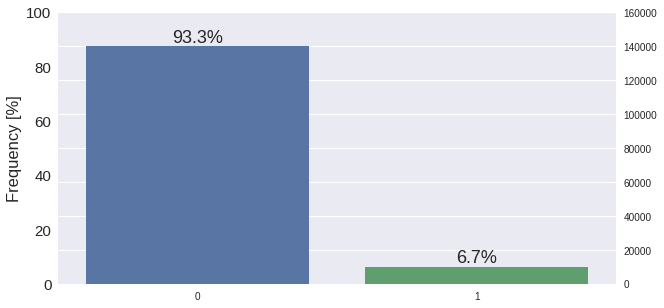

In [8]:
def add_freq():
    ncount = len(data)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)
    
ax = sns.countplot(x = data.SeriousDlqin2yrs)
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

add_freq()

plt.show()

Nosso resultado tem de ser no mínimo 93.3%

# Lidando com os Outliers

In [9]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))


def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = zip(data.index, x, y, z)
    final = []
    for k,i in enumerate(temp):
        if i.count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    
def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        tfOutlier = zip(x, func(x))
        nOutliers.append(len([index for (index, bol) in tfOutlier if bol == True]))
        outlierFree = [index for (index, bol) in tfOutlier if bol == True]
        sns.distplot(outlierFree, ax=ax, rug=True, hist=False)
        
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=15)
    axes[0].set_title('Percentile-based Outliers, removed: {r}'.format(r=nOutliers[0]), **kwargs)
    axes[1].set_title('MAD-based Outliers, removed: {r}'.format(r=nOutliers[1]), **kwargs)
    axes[2].set_title('STD-based Outliers, removed: {r}'.format(r=nOutliers[2]), **kwargs)
    axes[3].set_title('Majority vote based Outliers, removed: {r}'.format(r=nOutliers[3]), **kwargs)
    fig.suptitle('Outlier Removed By Method with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict

def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    print(type(data))
    print(type(vote))
    return(-1)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

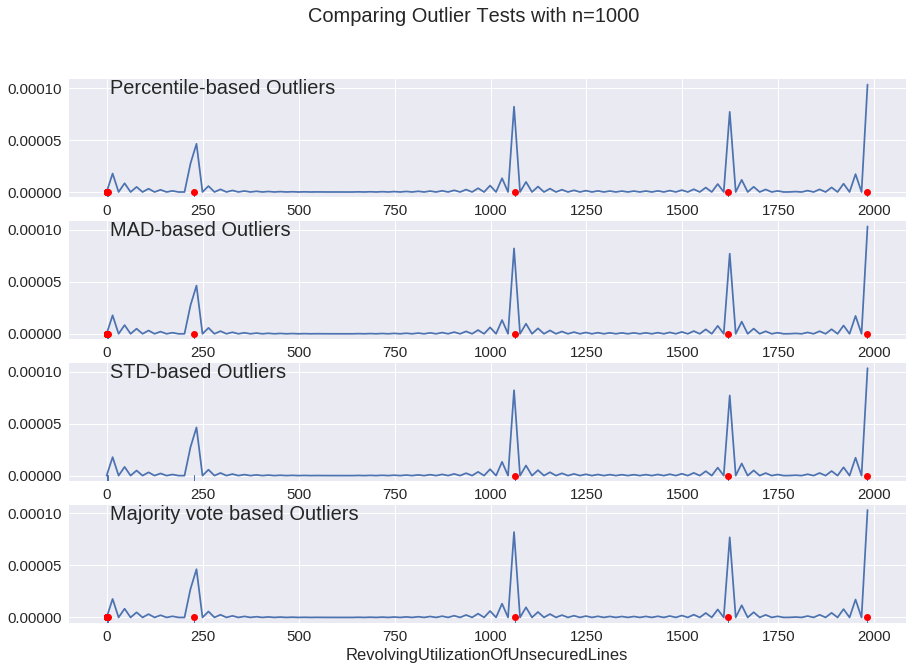

In [10]:
plotOutlier(data.RevolvingUtilizationOfUnsecuredLines.sample(1000))


Como os outliers são muito pequenos, então podemos colocar como um valor baixo e não perderemos muita predição

In [11]:
 data.RevolvingUtilizationOfUnsecuredLines =  data.RevolvingUtilizationOfUnsecuredLines.apply( lambda x: x if x<= 2 else 2.)

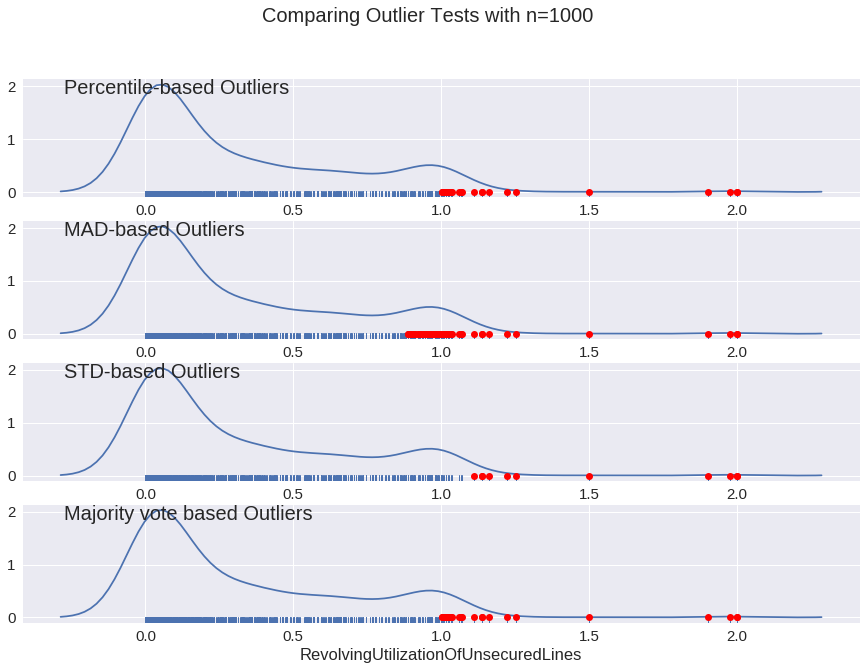

In [12]:
# Dados ajustados para a variável Revolving Utilization of Unsecured Lines
plotOutlier(data.RevolvingUtilizationOfUnsecuredLines.sample(1000))


# Variável Age

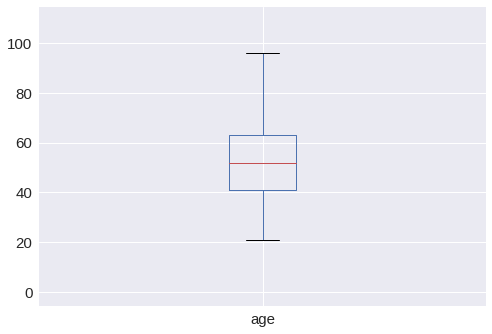

In [13]:
data.age.plot.box()

Percebe-se que as idades estão majoritariamente entre 40 e 60 anos e o desvio-padrão é bem alto. 

In [14]:
for i in range(14,30):
    print (i, len(data[data.age < i]))

14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 184
23 618
24 1259
25 2075
26 3028
27 4221
28 5559
29 7119


Vamos dar um lowerbound de 22 anos na variável Age, retirando aqueles Outliers.

In [15]:
data.age =  data.age.apply( lambda x: x if x > 22 else 22)

## Variável NumberOfTime3059DaysPastDueNotWorse 

Descrição: Numero de vezes que o cliente ficou 30-59 dias, e não mais, atrás do prazo nos últimos 2 anos, e não mais.
    

In [16]:
from collections import Counter

In [17]:
#Counter counts the data that are stored in a dictionary
Counter(data.NumberOfTime3059DaysPastDueNotWorse)

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

Então temos alguns outliers no grupo, já que ninguém poderia ficar 96-98 dias e ainda pertencer a esta categoria.

Portanto vamos substituí-los pela Mediana

In [18]:
New = []
med = data.NumberOfTime3059DaysPastDueNotWorse.median()
for val in data.NumberOfTime3059DaysPastDueNotWorse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

data.NumberOfTime3059DaysPastDueNotWorse = New

# Variável DebtRatio

In [19]:
data['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [20]:
outlierRatio(data.DebtRatio)

{'mad_based_outlier': [31727, '21.15%'],
 'outlierVote': [3750, '2.50%'],
 'percentile_based_outlier': [3750, '2.50%'],
 'std_div': [779, '0.52%']}

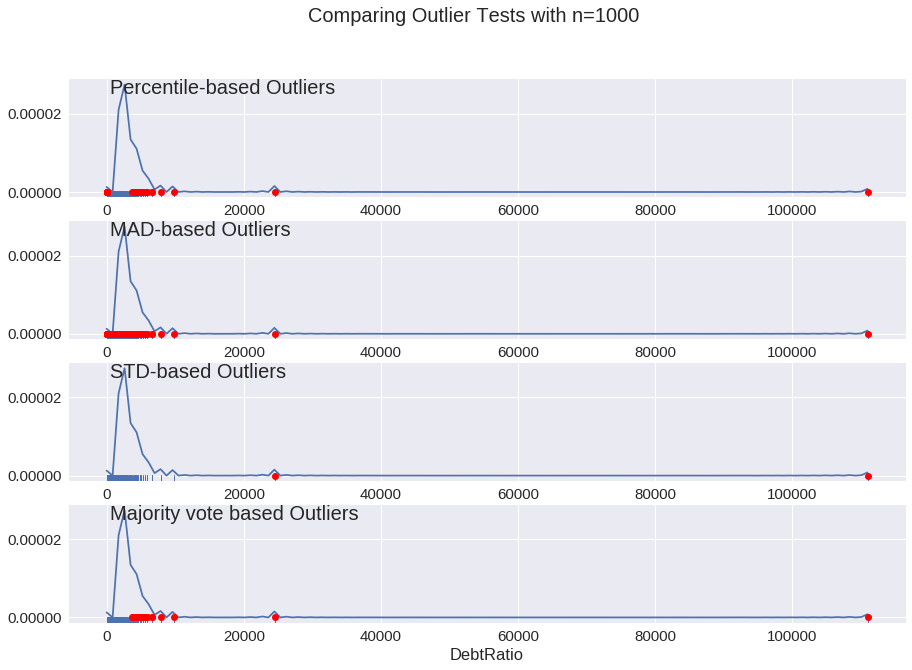

In [21]:
plotOutlier(data.DebtRatio.sample(1000))

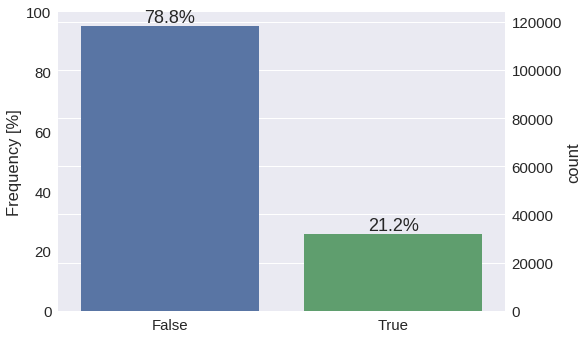

In [22]:
ax = sns.countplot(mad_based_outlier(data.DebtRatio))
add_freq()



In [23]:
minUpperBound = min([val for (val, out) in zip(data.DebtRatio, mad_based_outlier(data.DebtRatio)) if out == True])


In [24]:
data['DebtRatio'] = data['DebtRatio'].apply( lambda x: minUpperBound if x > minUpperBound else x)

In [25]:
data['DebtRatio'].describe()

count    150000.000000
mean          0.607359
std           0.588294
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max           1.641791
Name: DebtRatio, dtype: float64

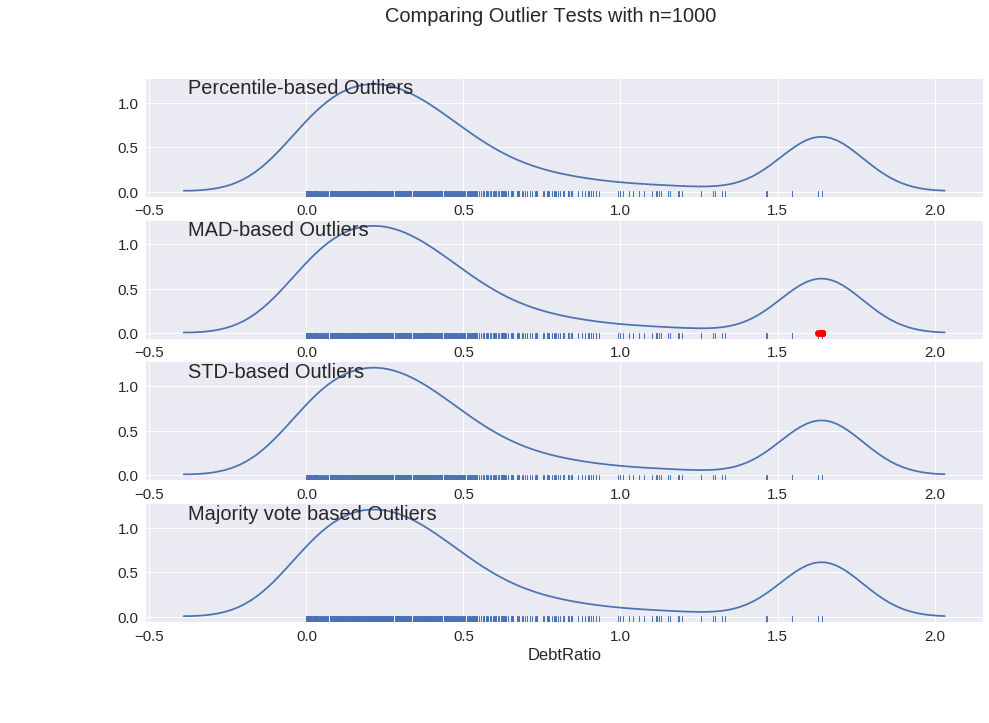

In [26]:
plotOutlier(data.DebtRatio.sample(1000))

|                                       |               |                                       |          |
|---------------------------------------|---------------|---------------------------------------|----------|
|  Describe antes de tirar os Outliers  |               |  Describe depois de tirar os outliers |          |
|                  mean                 |   353.005076  |                  mean                 | 0.607359 |
|                  std                  |  2037.818523  |                  std                  | 0.588294 |
|                  min                  |    0.000000   |                  min                  | 0.000000 |
|                  25%                  |    0.175074   |                  25%                  | 0.175074 |
|                  50%                  |    0.366508   |                  50%                  | 0.366508 |
|                  75%                  |    0.868254   |                  75%                  | 0.868254 |
|                  max                  | 329664.000000 |                  max                  | 1.641791 |
| Name: DebtRatio, dtype: float64</pre> |               | Name: DebtRatio, dtype: float64</pre> |          |

Perceba a diferença na media e desvio padrão (estatística descritiva), tirando-se os outliers.

## Variável Monthlyincome

Variável com dados faltantes, é preciso remover os Outliers antes de fazer uma regressão para preencher os dados.


/home/gabriel/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/gabriel/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/gabriel/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/gabriel/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median for 1 results
  r = func(a, **kwargs)
/home/gabriel/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/gabriel/anaconda3/lib/python3.6/site-packages/ipyke

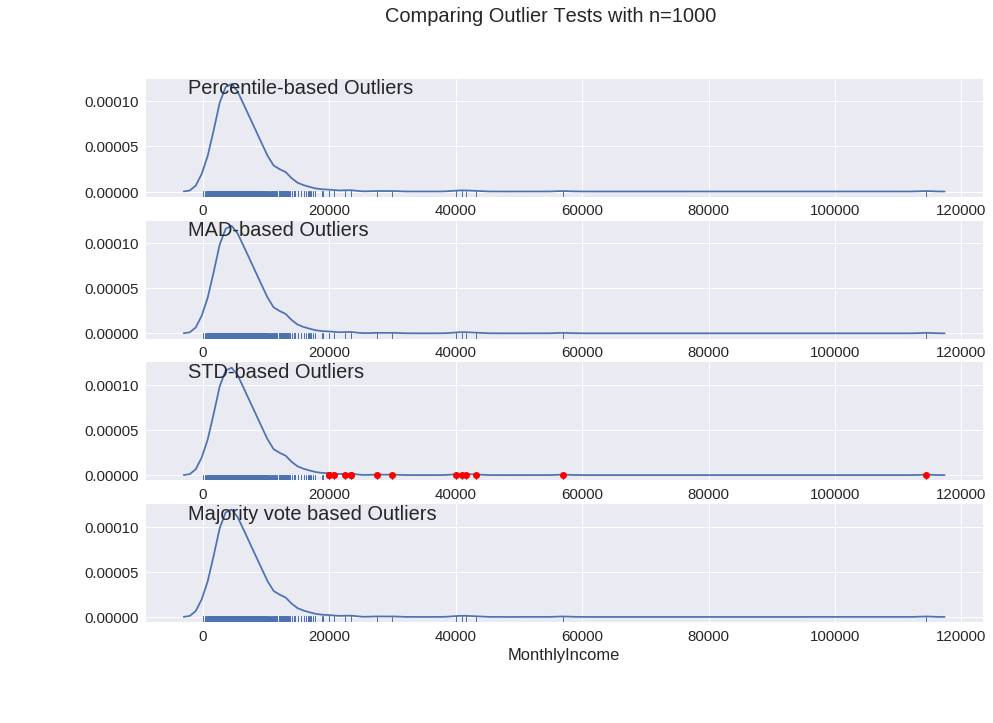

In [27]:
plotOutlier(data.MonthlyIncome.sample(1000))

In [28]:
print(Counter(percentile_based_outlier(data.MonthlyIncome)))
print(Counter(mad_based_outlier(data.MonthlyIncome)))
print(Counter(std_div(data.MonthlyIncome)))

#Caso queiram tirar os Outliers pelo método do desvio padrão
#new_income = replaceOutlier(data.MonthlyIncome, method= std_div, replace='minUpper')
#data.MonthlyIncome = new_income

Counter({False: 150000})
Counter({False: 150000})
Counter({False: 149609, True: 391})


/home/gabriel/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/gabriel/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median for 1 results
  r = func(a, **kwargs)
/home/gabriel/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/home/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


Por voto da maioria, decidimos não tirar outliers do Monthly Income

## Variável NumberOfTimes90DaysLate

In [29]:
#new = removeSpecificAndPutMedian(data.NumberOfTimes90DaysLate)
data.NumberOfTimes90DaysLate.describe()

count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

In [30]:
print(Counter(data.NumberOfTimes90DaysLate))

Counter({0: 141662, 1: 5243, 2: 1555, 3: 667, 4: 291, 98: 264, 5: 131, 6: 80, 7: 38, 8: 21, 9: 19, 10: 8, 96: 5, 11: 5, 13: 4, 15: 2, 14: 2, 12: 2, 17: 1})


In [31]:
data.NumberOfTimes90DaysLate = data1.NumberOfTimes90DaysLate

In [32]:
med = data.NumberOfTimes90DaysLate.median()
New = []
for k,val in enumerate(data.NumberOfTimes90DaysLate):
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)


In [33]:
data.NumberOfTimes90DaysLate = New

## Variável NumberRealEstateLoansOrLines

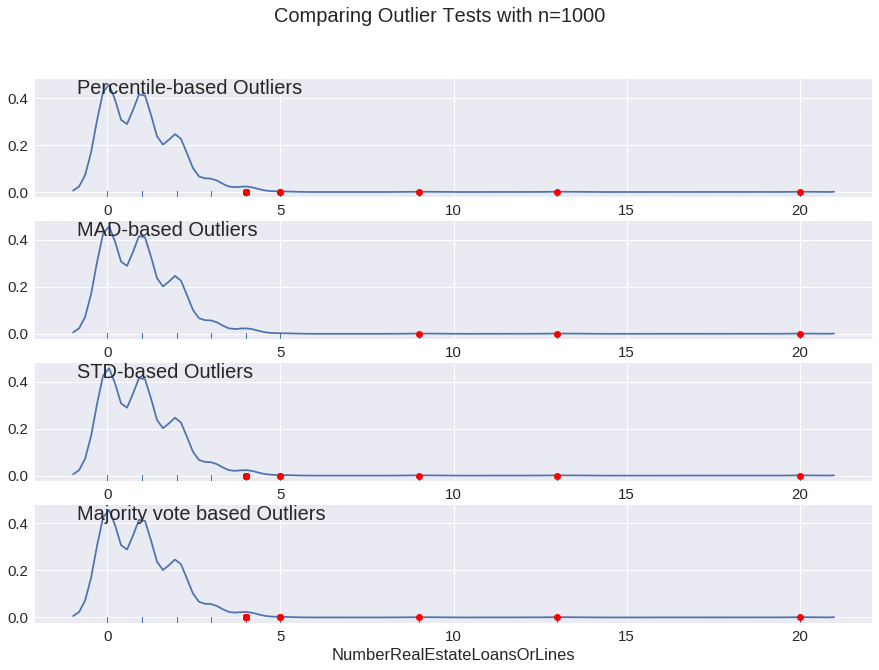

In [34]:
plotOutlier(data.NumberRealEstateLoansOrLines.sample(1000))

In [35]:
outlierRatio(data.NumberRealEstateLoansOrLines)

{'mad_based_outlier': [473, '0.32%'],
 'outlierVote': [3651, '2.43%'],
 'percentile_based_outlier': [3652, '2.43%'],
 'std_div': [3652, '2.43%']}

In [36]:
print(Counter(data.NumberRealEstateLoansOrLines))

Counter({0: 56188, 1: 52338, 2: 31522, 3: 6300, 4: 2170, 5: 689, 6: 320, 7: 171, 8: 93, 9: 78, 10: 37, 11: 23, 12: 18, 13: 15, 15: 7, 14: 7, 17: 4, 16: 4, 25: 3, 18: 2, 23: 2, 19: 2, 20: 2, 26: 1, 54: 1, 21: 1, 29: 1, 32: 1})


Podemos cortar os números a partir de 14.

In [37]:
data.NumberRealEstateLoansOrLines = data.NumberRealEstateLoansOrLines.apply(lambda x: x if x<=14 else 14.)

## NumberOfTime6089DaysPastDueNotWorse var

In [38]:
data.NumberOfTime6089DaysPastDueNotWorse.describe()

count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime6089DaysPastDueNotWorse, dtype: float64

/home/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


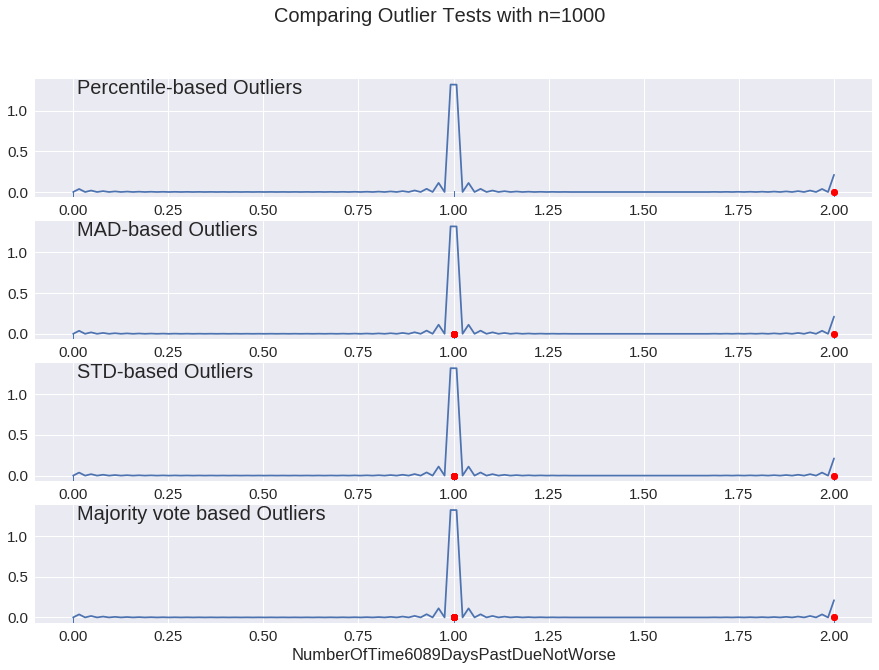

In [39]:
plotOutlier(data.NumberOfTime6089DaysPastDueNotWorse.sample(1000))

In [40]:
outlierRatio(data.NumberRealEstateLoansOrLines)

{'mad_based_outlier': [473, '0.32%'],
 'outlierVote': [3651, '2.43%'],
 'percentile_based_outlier': [3652, '2.43%'],
 'std_div': [3652, '2.43%']}

In [41]:
print(Counter(data.NumberRealEstateLoansOrLines))

Counter({0.0: 56188, 1.0: 52338, 2.0: 31522, 3.0: 6300, 4.0: 2170, 5.0: 689, 6.0: 320, 7.0: 171, 8.0: 93, 9.0: 78, 14.0: 38, 10.0: 37, 11.0: 23, 12.0: 18, 13.0: 15})


Para esta variável não há nada a fazer

## Var NumberOfDependents 

In [42]:
new_frame = data['NumberOfDependents'].dropna()
print(new_frame.count())
print(Counter(new_frame))

146076
Counter({0.0: 86902, 1.0: 26316, 2.0: 19522, 3.0: 9483, 4.0: 2862, 5.0: 746, 6.0: 158, 7.0: 51, 8.0: 24, 10.0: 5, 9.0: 5, 20.0: 1, 13.0: 1})


Podemos deixar a idade de 9 anos como Upperbound

/home/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/home/gabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


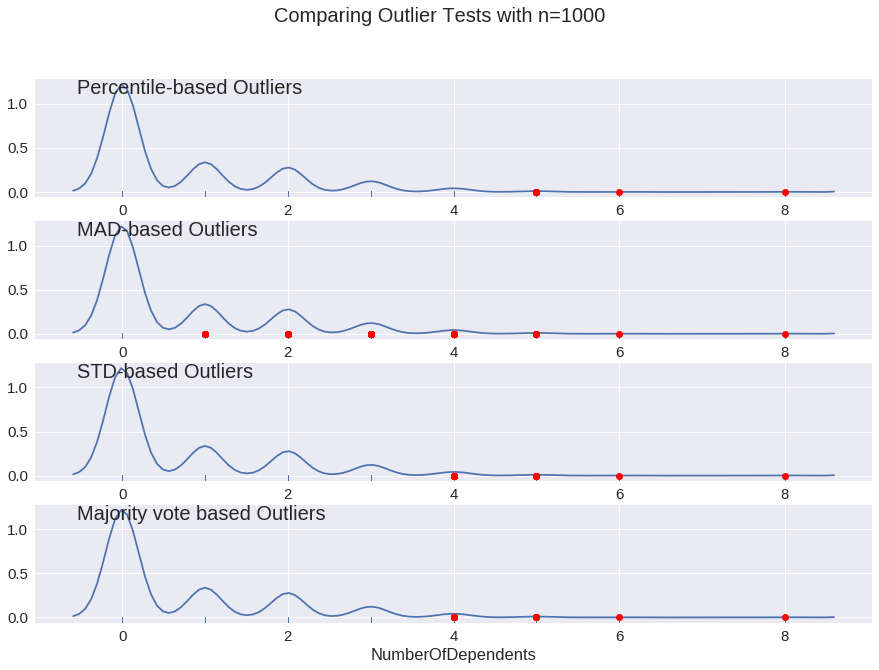

In [44]:
plotOutlier(new_frame.sample(1000))

In [45]:
data['NumberOfDependents'] = data['NumberOfDependents'].apply(lambda x: 9 if x >9 else x)

## Lidar com os dados faltantesm

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime3059DaysPastDueNotWorse     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null float64
NumberRealEstateLoansOrLines            150000 non-null float64
NumberOfTime6089DaysPastDueNotWorse     150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(7), int64(4)
memory usage: 12.6 MB


Como número de dependentes são valores entre 0  e 9, e pela natureza da variável, vale a pena imputar os dados faltantes com a Mediana.

Já para MonthlyIncome é preciso fazer uma regressão para colocar dados "falsos". A priori seria interessante testar
diferentes regressores, porém irei usar apenas regressores de baixa complexidade computacional.

### Prencheer os dados faltantes da variável Monthly Income com a sua Mediana.

In [47]:
data.MonthlyIncome = data1.MonthlyIncome

In [48]:
data.NumberOfDependents = data.NumberOfDependents.fillna(data.NumberOfDependents.median())

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime3059DaysPastDueNotWorse     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null float64
NumberRealEstateLoansOrLines            150000 non-null float64
NumberOfTime6089DaysPastDueNotWorse     150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(7), int64(4)
memory usage: 12.6 MB


## Usar um regressor para calcular os dados faltantes na variável Monthly Income

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime3059DaysPastDueNotWorse     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null float64
NumberRealEstateLoansOrLines            150000 non-null float64
NumberOfTime6089DaysPastDueNotWorse     150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(7), int64(4)
memory usage: 12.6 MB


In [51]:
train = data[data.MonthlyIncome.isnull() == False]
test = data[data.MonthlyIncome.isnull() == True]

In [52]:
train.shape, test.shape
print(train.shape[0] + test.shape[0])

150000


In [53]:
X_train = train.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)
y_train = train.MonthlyIncome
X_test = test.drop(['MonthlyIncome', 'SeriousDlqin2yrs'], axis=1)

In [54]:
# Usaremos a Regressão Linear pois não é tão custosa computacionalmente
lmMod = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)

In [55]:
y_pred = lmMod.predict(X_test)

In [59]:
print(y_pred.min())
print(y_pred.max())
y_pred = np.clip(y_pred,0,y_pred.max())
print(y_pred.min())
print(y_pred.max())

0.0
27273.1318972
0.0
27273.1318972


In [60]:
# Substituindo os valores que eram NaN com o valores preditos pela regressão Logística
data.MonthlyIncome.iloc[X_test.index.values] = y_pred


/home/gabriel/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Train/Test Split. 

OK. Agora que tiramos os outliers e imputamos os dados faltantes, vamos criar um set de train e um de test.

In [61]:
from sklearn.cross_validation import train_test_split

X = data.drop('SeriousDlqin2yrs', axis=1)
y = data.SeriousDlqin2yrs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

/home/gabriel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (112500, 10)
X_test shape (37500, 10)
y_train shape (112500,)
y_test shape (37500,)


## Making Predictions

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import time
from pprint import pprint


In [64]:
def cvDictGen(functions, scr, X_train=X_train, y_train=y_train, cv=3, verbose=1):
    cvDict = {}
    for k,func in enumerate(functions):
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = { 'mean' : cvScore.mean(), 'std' : cvScore.std()}
    return cvDict


Estabelecendo as funções dos algoritmos "mais famosos".

In [65]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [66]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [67]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

In [68]:
begin = time.time()
cvD = cvDictGen(functions=[adaMod, gbMod, rfMod], scr='roc_auc')
end = time.time()
print('Time elapsed is = {0:3f} seconds'.format(end-begin))


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   37.4s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   49.3s finished


Time elapsed is = 91.197307 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s finished


In [77]:
pprint(cvD)

{'AdaBoostClassifier': {'mean': 0.85869135056060808,
                        'std': 0.0023370585585925814},
 'GradientBoostingClassifier': {'mean': 0.86414082527809677,
                                'std': 0.0014776956925652127},
 'RandomForestClassifier': {'mean': 0.78309339009177059,
                            'std': 0.001292345755575232}}


Escolhendo assim o Gradient Boost e o AdaBoost, pois se mostraram os melhores modelos.

## Hyper parameter optimization

In [78]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint

from xgboost import XGBClassifier


/home/gabriel/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [79]:
ada_param_grid = {'n_estimators': [10,50,100,200,400]}
#ada_param_grid = {'n_estimators': [10,50]}

gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=ada_param_grid, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] ........................................ n_estimators=10 -   0.8s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ........................................ n_estimators=10 -   0.7s
[CV] n_estimators=10 .................................................
[CV] ........................................ n_estimators=10 -   0.7s
[CV] n_estimators=50 .................................................
[CV] ........................................ n_estimators=50 -   3.7s
[CV] n_estimators=50 .................................................
[CV] ........................................ n_estimators=50 -   4.5s
[CV] n_estimators=50 .................................................
[CV] ........................................ n_estimators=50 -   5.7s
[CV] n_estimators=100 ................................................
[CV] ....................................... n_estimators=100 -   7.7s
[CV] n_estimators=100 ................................................
[CV] ....................................... n_estimators=100 -  11.0s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.9min finished


In [80]:
print('Best param is Ada Classifier is ',gridSearchAda.best_params_)
print('Best score is in Ada Classifier is {0:.3f} AUC.'.format(gridSearchAda.best_score_))

Best param is Ada Classifier is  {'n_estimators': 100}
Best score is in Ada Classifier is 0.859 AUC.


gbMod_backup = gbMod


In [81]:
gboost_param_grid = {'loss' : ['deviance', 'exponential'],
                     'n_estimators': randint(10, 500),'max_depth': randint(1,10)}



gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,

                                   init=None, random_state=None, max_features=None, verbose=0)
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gboost_param_grid, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=deviance, max_depth=4, n_estimators=398 ....................


KeyboardInterrupt: 

In [82]:
print('Best param is GBM Classifier is ',gridSearchGB.best_params_)
print('Best score is in GBM Classifier is {0:.3f} AUC.'.format(gridSearchGB.best_score_))

NameError: name 'gridSearchGB' is not defined

Acabamos usando o modelo Ada Classifier pois é menos custoso computacionalmente. 

[Site que pode melhorar a tunagem de parametros do gbm](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) 

## Fitar os melhores algoritmos escolhidos

In [ ]:
print('Timing para o melhor GBM')
bestGbModFitted = timing(gridSearchGB.best_estimator_.fit(X_train, y_train))

In [83]:
print('Timing para o melhor AB')
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

Timing para o melhor AB


## Salvar os modelos por precaução

In [72]:
from sklearn.externals import joblib
filename = 'ada_classifier' 
#joblib.dump(bestAdaModFitted, filename+'.pkl') 
#filename = 'xgboost_classifier' 
#joblib.dump(bestAdaModFitted, filename+'.pkl') 
bestAdaModFitted = joblib.load(filename+'.pkl') 


## Plotar a curva AUC com o melhor algoritmo escolhido

“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.”

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.
The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

Finding the Optimal Cutoff Value (Optimal Decision Threshold)
While the ROC curve and corresponding AUC give an overall picture of the behavior of a diagnostic test across
all cutoff values, there remains a practical need to determine the specific cutoff value that should be used for
individuals requiring diagnosis. If the cost of each diagnostic decision is known, as well as the positive condition
prevalence, the optimal cutoff value is the one that minimizes cost, as described under Cost in the Other
Diagnostic Accuracy Indices section. However, cost and prevalence values are typically unknown and
unattainable. In this case, a recommended approach is to find the cutoff with highest Youden Index, or
equivalently, the highest Sensitivity + Specificity (see Krzanowski and Hand, 2009). These indices are also
described in the Other Diagnostic Accuracy Indices section.



In [84]:
def plotCvRocCurve(X, y, classifier, nfolds=5):
    
    from sklearn.metrics import roc_curve, auc
    from sklearn.cross_validation import StratifiedKFold
    import matplotlib.pyplot as plt
    from scipy import interp

    cv = StratifiedKFold(y, n_folds=nfolds)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(15,5)

    plt.show()
    
    
    
    
    
def rocZeroOne(y_true, y_predicted_porba):
    from sklearn.metrics import roc_curve
    from scipy.spatial.distance import euclidean
   
    #calculates the False_Positive_rate, the True_positive_Rate and the Thresholds of a ROC_CURVE.
    fpr, tpr, thresholds = roc_curve(y_true, y_predicted_porba[:, 1])
    
    best = [0, 1] # Best point with 0 False positive and 1 True Positives
    dist = []
    for (x, y) in zip(fpr, tpr):
        dist.append([euclidean([x,y], best)]) #Euclidean distance between the curve and the point [0,1]
    
    bestPoint = [fpr[dist.index(min(dist))], tpr[dist.index(min(dist))]] #Points that minimizes the distance
    
    bestCutOff1 = thresholds[list(fpr).index(bestPoint[0])]
    bestCutOff2 = thresholds[list(tpr).index(bestPoint[1])]
    
    print ('\n' + 'Best point on the ROC: TPR = {:0.3f}%, FPR = {:0.3f}%'.format(bestPoint[1]*100, bestPoint[0]*100))
    print ('\n' + 'Best Cut-Off point: {:0.4f}'.format(bestCutOff1))

    # Plots a distance x index graph
    #plt.plot(dist)
    #plt.xlabel('Index')
    #plt.ylabel('Euclidean Distance to the perfect [0,1]')
    #fig = plt.gcf()
    #fig.set_size_inches(15,5)

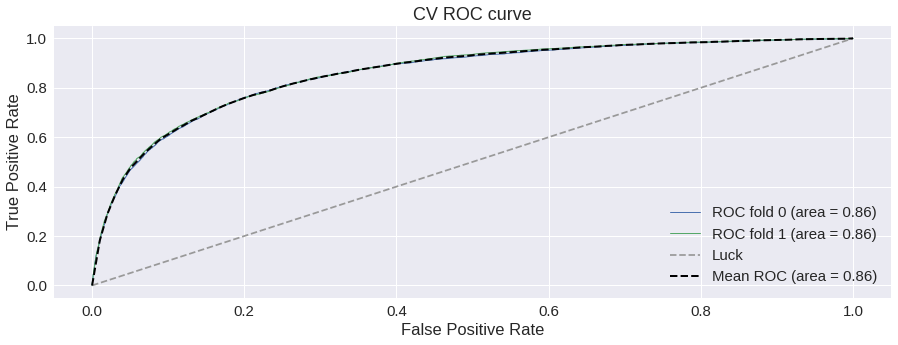

In [88]:

plotCvRocCurve(X, y,gridSearchAda.best_estimator_, nfolds=2)

In [89]:
#sfilename = 'ada_gridsearch' 
#joblib.dump(gridSearchAda, filename+'.pkl') 
#filename = 'xgboost_classifier' 
#joblib.dump(bestAdaModFitted, filename+'.pkl') 
#gridSearchAda2 = joblib.load(filename+'.pkl') 

['ada_gridsearch.pkl']

In [74]:
rocZeroOne(y_test, bestAdaModFitted.predict_proba(X_test))


Best point on the ROC: TPR = 79.567%, FPR = 22.245%

Best Cut-Off point: 0.4929


“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.”

In [ ]:
def plotCvRocCurve(X, y, classifier, nfolds=5):
    
    from sklearn.metrics import roc_curve, auc
    from sklearn.cross_validation import StratifiedKFold
    import matplotlib.pyplot as plt
    from scipy import interp

    cv = StratifiedKFold(y, n_folds=nfolds)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(15,5)

    plt.show()

In [149]:
def plotCvRocCurve(X, y, classifier, nfolds=5):
    
    from sklearn.metrics import roc_curve, auc
    from sklearn.cross_validation import StratifiedKFold
    import matplotlib.pyplot as plt
    from scipy import interp

    cv = StratifiedKFold(y, n_folds=nfolds)

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(15,5)

    # create the axis of thresholds (scores)
    ax2 = plt.gca().twinx()
    ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    ax2.set_ylabel('Threshold',color='r')
    ax2.set_ylim([thresholds[-1],thresholds[0]])
    ax2.set_xlim([fpr[0],fpr[-1]])
    plt.show()
    
    
    

In [156]:
plotCvRocCurve(X, y, gridSearchAda.best_estimator_)

TypeError: object of type 'numpy.float64' has no len()